In [58]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [59]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [60]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [61]:
def forward(X, W, b):
    z = np.dot(X, W) + b
    return sigmoid(z)


In [62]:
def backward(X, y, y_pred):
    m = len(X)  # Number of samples
    
    # Calculate gradients for weight and bias
    gradient_weight = (2 / m) * np.sum((y_pred - y) * X)
    gradient_bias = (2 / m) * np.sum(y_pred - y)
    

    return gradient_weight, gradient_bias


In [63]:
def sgd(X, y, W, b, learning_rate, epochs):
    m = len(X)  # Number of samples
    for epoch in range(epochs):
        total_loss = 0  # Initialize total loss for this epoch
        
        for i in range(m):
            # Forward propagation for a single example
            y_pred = forward(X[i], W, b)
            
            # Calculate loss for this example
            loss = (y[i] - y_pred) ** 2  # Assuming mean squared error (MSE)
            total_loss += loss
            
            # Calculate gradients using the modified backward function
            gradient_weight, gradient_bias = backward(X[i], y[i], y_pred)
            
            # Update weights and bias
            W -= learning_rate * gradient_weight
            b -= learning_rate * gradient_bias
        
        # Calculate average loss for the epoch
        avg_loss = total_loss / m
        
        # Print progress every epoch
        print(f"Epoch {epoch}, Loss: {avg_loss}")
    
    return W, b


In [64]:
X = np.array([[1], [2], [3]])  # Input features
y = np.array([0, 1, 1])        # Binary labels

# Initialize weight and bias
W = np.random.rand(X.shape[1])  # Random initial weight
b = np.random.rand()            # Random initial bias

# Define learning rate and epochs
learning_rate = 0.01
epochs = 1000

m = len(X)

# Step 7: Train the Model
W, b = sgd(X, y, W, b, learning_rate, epochs)

# Final results
print("Optimized Weight:", W)
print("Optimized Bias:", b)

Epoch 0, Loss: 0.19578843890131134
Epoch 1, Loss: 0.1921188166619424
Epoch 2, Loss: 0.18902030601813835
Epoch 3, Loss: 0.18639471739842864
Epoch 4, Loss: 0.18416107798021183
Epoch 5, Loss: 0.1822526886643634
Epoch 6, Loss: 0.18061460724952003
Epoch 7, Loss: 0.17920153840741038
Epoch 8, Loss: 0.17797608728700864
Epoch 9, Loss: 0.176907325906322
Epoch 10, Loss: 0.17596962222080756
Epoch 11, Loss: 0.17514168640944827
Epoch 12, Loss: 0.17440579500826744
Epoch 13, Loss: 0.17374715974566926
Epoch 14, Loss: 0.17315341367352496
Epoch 15, Loss: 0.17261419219702992
Epoch 16, Loss: 0.172120790837034
Epoch 17, Loss: 0.17166588505851896
Epoch 18, Loss: 0.17124330035573876
Epoch 19, Loss: 0.17084782309610602
Epoch 20, Loss: 0.17047504448488196
Epoch 21, Loss: 0.17012123150432756
Epoch 22, Loss: 0.16978321987504705
Epoch 23, Loss: 0.16945832504259703
Epoch 24, Loss: 0.16914426795697865
Epoch 25, Loss: 0.16883911302504687
Epoch 26, Loss: 0.1685412161071237
Epoch 27, Loss: 0.16824918082385454
Epoch 28,

In [65]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


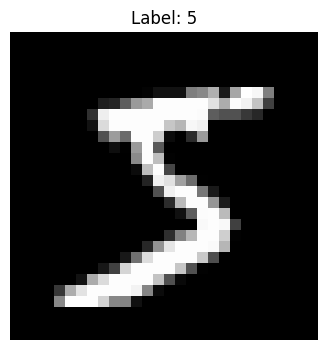

In [66]:
plt.figure(figsize=(4, 4))
plt.imshow(X_train[0], cmap='gray')  # Affiche la première image du dataset d'entraînement
plt.title(f"Label: {y_train[0]}")
plt.axis('off')  # Masquer les axes pour un affichage plus clair
plt.show()

In [67]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


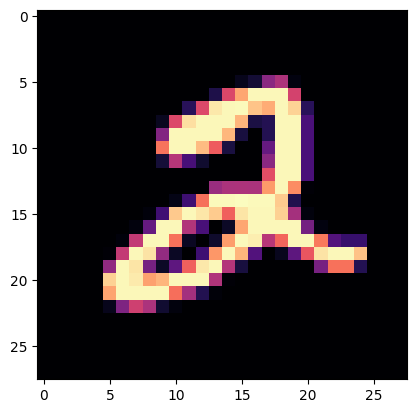

In [68]:
plt.imshow(X_train[5], cmap='magma')

In [69]:
# Flatten each image in X_train and X_test
X_train = np.array([x.flatten() for x in X_train])
X_test = np.array([x.flatten() for x in X_test])

print("Nouvelle forme de X_train:", X_train.shape)
print("Nouvelle forme de X_test:", X_test.shape)


Nouvelle forme de X_train: (60000, 784)
Nouvelle forme de X_test: (10000, 784)


In [70]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Exemple de y_train après one-hot encoding:", y_train[0])


Exemple de y_train après one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


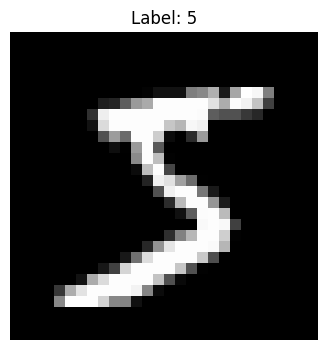

Nouvelle forme de X_train: (60000, 784)
Nouvelle forme de X_test: (10000, 784)
Exemple de y_train après one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Epoch 1/10


C:\Users\pc\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8767 - loss: 0.4206 - val_accuracy: 0.9633 - val_loss: 0.1257
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9668 - loss: 0.1056 - val_accuracy: 0.9699 - val_loss: 0.0976
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9782 - loss: 0.0691 - val_accuracy: 0.9710 - val_loss: 0.0902
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9836 - loss: 0.0515 - val_accuracy: 0.9756 - val_loss: 0.0759
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9880 - loss: 0.0382 - val_accuracy: 0.9767 - val_loss: 0.0777
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9787 - val_loss: 0.0770
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9915 - loss: 0.0251 - val_accuracy: 0.9790 - val_loss: 0.0761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9932 - loss: 0.0203 - val_accurac

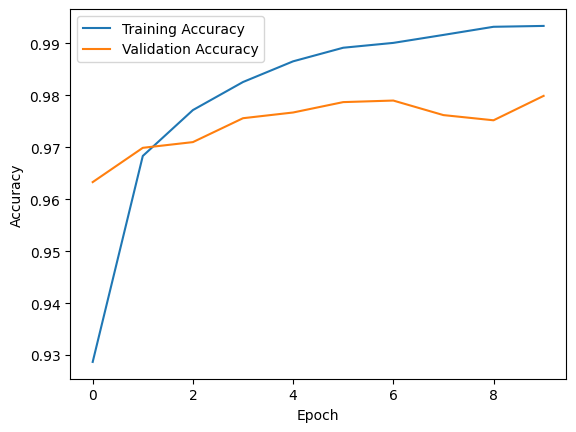

In [74]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the first image
plt.figure(figsize=(4, 4))
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

# Preprocess the data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train = np.array([x.flatten() for x in X_train])  # Flatten each image
X_test = np.array([x.flatten() for x in X_test])
print("Nouvelle forme de X_train:", X_train.shape)
print("Nouvelle forme de X_test:", X_test.shape)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print("Exemple de y_train après one-hot encoding:", y_train[0])

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer
    Dense(64, activation='relu'),                       # Second hidden layer
    Dense(10, activation='softmax')                     # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
